In [1]:
__name__

'__main__'

In [2]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bottleneck
import statsmodels.api as sm
import openpyxl
import xlrd
import statistics
import random as rd
import seaborn as sns

In [3]:
pd.__version__

'1.1.3'

In [4]:
np.__version__

'1.19.2'

In [5]:
openpyxl.__version__

'3.0.5'

In [6]:
team2_survey_location = "/Users/Perry/Google Drive File Stream/My Drive/Commerce/Fall 20/BUSA 521/Phase 3/Fall 2020 - Team 2 - Consumer Intention toward Online Grocery Shopping_November 20, 2020_01.17.csv"

In [7]:
# Read the file

team2_raw_data = pd.read_csv(filepath_or_buffer=team2_survey_location, sep=",")

In [8]:
# Preview the raw data

team2 = team2_raw_data
team2_raw_data.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,The groceries bought online meet my expectations,Online grocery shopping helps me save time,I am satisfied with the time between placement...,Online grocery shopping services are accessibl...,It is easy to get help from customer service w...,Online grocery shopping helps me save money,"On average, the products that I buy using onli...",I am most likely to find better deals on groce...,The COVID-19 pandemic had an impact on my inte...,I intent to keep buy groceries using online se...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID30""}","{""ImportId"":""QID18""}","{""ImportId"":""QID31""}","{""ImportId"":""QID26""}","{""ImportId"":""QID27""}","{""ImportId"":""QID19""}","{""ImportId"":""QID21""}","{""ImportId"":""QID24""}","{""ImportId"":""QID32""}","{""ImportId"":""QID33""}"
2,11/9/20 23:53,11/9/20 23:53,Survey Preview,NaN,100,13,TRUE,11/9/20 23:53,R_1ps0VLIKs4vHchb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/12/20 15:39,11/12/20 15:42,IP Address,75.17.224.126,100,173,TRUE,11/12/20 15:42,R_dmYDTvdWhjBFl97,NaN,...,Neither agree nor disagree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Agree,Somewhat agree
4,11/12/20 15:43,11/12/20 15:46,IP Address,70.120.201.141,100,213,TRUE,11/12/20 15:46,R_2THJMZGTYxnb90v,NaN,...,Agree,Agree,Agree,Agree,Agree,Somewhat agree,Somewhat agree,Somewhat agree,Agree,Agree


In [9]:
# Clean the data 

team2.drop(labels=[0, 1], axis=0, inplace=True)
team2.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
2,11/9/20 23:53,11/9/20 23:53,Survey Preview,NaN,100,13,TRUE,11/9/20 23:53,R_1ps0VLIKs4vHchb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/12/20 15:39,11/12/20 15:42,IP Address,75.17.224.126,100,173,TRUE,11/12/20 15:42,R_dmYDTvdWhjBFl97,NaN,...,Neither agree nor disagree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Agree,Somewhat agree
4,11/12/20 15:43,11/12/20 15:46,IP Address,70.120.201.141,100,213,TRUE,11/12/20 15:46,R_2THJMZGTYxnb90v,NaN,...,Agree,Agree,Agree,Agree,Agree,Somewhat agree,Somewhat agree,Somewhat agree,Agree,Agree
5,11/12/20 15:49,11/12/20 15:52,IP Address,104.222.24.129,100,178,TRUE,11/12/20 15:52,R_21sMs2V1PncBlWh,NaN,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree
6,11/12/20 15:49,11/12/20 15:56,IP Address,76.116.64.6,100,382,TRUE,11/12/20 15:56,R_3QJKXQgKXtVzn2O,NaN,...,Strongly agree,Agree,Agree,Strongly agree,Agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Strongly agree,Strongly agree


In [10]:
team2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 2 to 132
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   StartDate              131 non-null    object
 1   EndDate                131 non-null    object
 2   Status                 131 non-null    object
 3   IPAddress              130 non-null    object
 4   Progress               131 non-null    object
 5   Duration (in seconds)  131 non-null    object
 6   Finished               131 non-null    object
 7   RecordedDate           131 non-null    object
 8   ResponseId             131 non-null    object
 9   RecipientLastName      0 non-null      object
 10  RecipientFirstName     0 non-null      object
 11  RecipientEmail         0 non-null      object
 12  ExternalReference      0 non-null      object
 13  LocationLatitude       129 non-null    object
 14  LocationLongitude      129 non-null    object
 15  DistributionChannel    

In [11]:
# preview the non-null value

len(team2) - team2.count()

StartDate                  0
EndDate                    0
Status                     0
IPAddress                  1
Progress                   0
Duration (in seconds)      0
Finished                   0
RecordedDate               0
ResponseId                 0
RecipientLastName        131
RecipientFirstName       131
RecipientEmail           131
ExternalReference        131
LocationLatitude           2
LocationLongitude          2
DistributionChannel        0
UserLanguage               0
Q1                         1
Q2                        65
Q3                        65
Q4                        65
Q5                        65
Q6                        65
Q7_NPS_GROUP              65
Q7                        65
Q8                        65
Q9                        65
Q10                       65
Q11                       65
Q12                       65
Q13                       65
Q14                       65
Q15                       65
Q16                       65
Q17           

In [12]:
team2

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
2,11/9/20 23:53,11/9/20 23:53,Survey Preview,NaN,100,13,TRUE,11/9/20 23:53,R_1ps0VLIKs4vHchb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/12/20 15:39,11/12/20 15:42,IP Address,75.17.224.126,100,173,TRUE,11/12/20 15:42,R_dmYDTvdWhjBFl97,NaN,...,Neither agree nor disagree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Agree,Somewhat agree
4,11/12/20 15:43,11/12/20 15:46,IP Address,70.120.201.141,100,213,TRUE,11/12/20 15:46,R_2THJMZGTYxnb90v,NaN,...,Agree,Agree,Agree,Agree,Agree,Somewhat agree,Somewhat agree,Somewhat agree,Agree,Agree
5,11/12/20 15:49,11/12/20 15:52,IP Address,104.222.24.129,100,178,TRUE,11/12/20 15:52,R_21sMs2V1PncBlWh,NaN,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree
6,11/12/20 15:49,11/12/20 15:56,IP Address,76.116.64.6,100,382,TRUE,11/12/20 15:56,R_3QJKXQgKXtVzn2O,NaN,...,Strongly agree,Agree,Agree,Strongly agree,Agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Strongly agree,Strongly agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,11/18/20 07:31,11/18/20 07:31,IP Address,74.211.46.106,100,17,TRUE,11/18/20 07:31,R_1nZTYwMUqTl1x2d,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,11/18/20 18:10,11/18/20 18:14,IP Address,72.182.208.35,100,241,TRUE,11/18/20 18:14,R_xxcEpOH1QdTHaGB,NaN,...,Somewhat agree,Strongly agree,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat agree,Disagree,Disagree,Agree,Agree
130,11/18/20 19:13,11/18/20 19:14,IP Address,76.107.243.26,100,7,TRUE,11/18/20 19:14,R_12g96idPrSptTa1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,11/12/20 16:03,11/12/20 16:03,IP Address,96.49.56.10,7,6,FALSE,11/19/20 16:03,R_1PTTgpLMeY8tHO0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Filter the data based on "Finished" column (Finish the survery or not) 
# and "Q1" column (Have you shopped online grocery?)

mask1 = team2["Finished"] == "TRUE"
mask2 = team2["Q1"] == "Yes"

team2 = team2[mask1 & mask2]

In [14]:
team2.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_NPS_GROUP', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26'],
      dtype='object')

In [15]:
team2_model = team2[["Q8", "Q9", "Q10", "Q11", "Q12", "Q13", "Q14", "Q15", "Q16", "Q17", 
                     "Q18", "Q19", "Q20", "Q21", "Q22", "Q23", "Q24", "Q25", "Q26"]].copy()

In [16]:
team2_model.reset_index(drop=True, inplace=True)
team2_model.head()

,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
0,Agree,Strongly agree,Somewhat agree,Agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Agree,Somewhat agree
1,Agree,Agree,Somewhat agree,Agree,Agree,Agree,Agree,Somewhat agree,Somewhat agree,Agree,Agree,Agree,Agree,Agree,Somewhat agree,Somewhat agree,Somewhat agree,Agree,Agree
2,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree
3,Agree,Agree,Somewhat agree,Strongly agree,Strongly agree,Agree,Somewhat agree,Agree,Agree,Strongly agree,Agree,Agree,Strongly agree,Agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Strongly agree,Strongly agree
4,Agree,Somewhat disagree,Somewhat agree,Agree,Agree,Strongly agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Agree,Agree,Agree,Somewhat agree,Somewhat agree,Agree,Somewhat agree,Agree,Agree


In [17]:
team2_model

,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
0,Agree,Strongly agree,Somewhat agree,Agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Agree,Somewhat agree
1,Agree,Agree,Somewhat agree,Agree,Agree,Agree,Agree,Somewhat agree,Somewhat agree,Agree,Agree,Agree,Agree,Agree,Somewhat agree,Somewhat agree,Somewhat agree,Agree,Agree
2,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree
3,Agree,Agree,Somewhat agree,Strongly agree,Strongly agree,Agree,Somewhat agree,Agree,Agree,Strongly agree,Agree,Agree,Strongly agree,Agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Strongly agree,Strongly agree
4,Agree,Somewhat disagree,Somewhat agree,Agree,Agree,Strongly agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Agree,Agree,Agree,Somewhat agree,Somewhat agree,Agree,Somewhat agree,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Strongly disagree,Agree,Agree,Agree,Strongly agree,Agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Strongly agree,Strongly agree,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Agree
61,Somewhat disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Somewhat agree,Agree,Somewhat agree,Strongly agree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Strongly agree,Somewhat agree
62,Somewhat disagree,Somewhat agree,Somewhat agree,Agree,Agree,Strongly agree,Agree,Somewhat agree,Somewhat agree,Somewhat agree,Strongly agree,Agree,Agree,Somewhat agree,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat agree
63,Somewhat agree,Somewhat agree,Somewhat agree,Strongly agree,Somewhat agree,Agree,Somewhat agree,Agree,Agree,Somewhat agree,Somewhat agree,Somewhat agree,Agree,Somewhat agree,Agree,Somewhat agree,Somewhat agree,Strongly agree,Somewhat agree


In [18]:
# Categorize the variables

team2_model["Q8"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q9"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q10"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q11"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q12"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q13"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q14"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q15"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q16"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q17"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q18"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q19"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q20"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q21"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q22"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q23"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q24"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q25"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

team2_model["Q26"].replace(to_replace=["Strongly disagree", "Disagree", "Somewhat disagree",
                                 "Neither agree nor disagree", "Somewhat agree",
                                 "Agree", "Strongly agree"], 
                     value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

In [19]:
team2_model.head(60)

,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
0,5,6,4,5,3,4,4,4,4,3,5,5,5,5,3,4,3,5,4
1,5,5,4,5,5,5,5,4,4,5,5,5,5,5,4,4,4,5,5
2,3,3,6,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4
3,5,5,4,6,6,5,4,5,5,6,5,5,6,5,4,4,3,6,6
4,5,2,4,5,5,6,5,3,3,4,5,5,5,4,4,5,4,5,5
5,5,4,3,4,5,4,4,3,3,4,3,4,4,3,1,2,4,4,5
6,1,1,1,5,6,4,4,1,4,2,5,1,5,2,1,0,1,5,4
7,6,1,2,5,2,5,6,3,4,5,6,5,6,5,5,5,4,5,5
8,2,4,2,1,5,4,2,4,4,4,4,4,2,3,2,2,1,6,4
9,2,5,1,5,5,5,5,6,6,6,6,4,4,5,5,4,2,5,5


#  Model 1
# DV Q26 ->  Consumer’s Intention to purchase grocery online
# IV1 Q8 ->  Products' Availability
# IV2 Q11 -> Covid-19 Regualtions
# IV3 Q14 -> Health Risks Perception
# IV4 Q17 -> Products' Quality
# IV5 Q19 -> Time Saving
# IV6 Q21 -> Products' Accessibility 
# IV7 Q24 -> Price And Deal

In [50]:
# Drop the unnecessary columns

model_1 = team2_model[["Q26", "Q8", "Q11", "Q14", "Q17", "Q19", "Q21", "Q24"]].copy()
model_1.head()

,Q26,Q8,Q11,Q14,Q17,Q19,Q21,Q24
0,4,5,5,4,3,5,5,3
1,5,5,5,5,5,5,5,4
2,4,3,3,3,4,4,4,4
3,6,5,6,4,6,5,5,3
4,5,5,5,5,4,5,4,4


In [51]:
# Reset the index 

model_1.reset_index(drop=True, inplace=True)
model_1.head()

,Q26,Q8,Q11,Q14,Q17,Q19,Q21,Q24
0,4,5,5,4,3,5,5,3
1,5,5,5,5,5,5,5,4
2,4,3,3,3,4,4,4,4
3,6,5,6,4,6,5,5,3
4,5,5,5,5,4,5,4,4


In [52]:
# Rename the columns

model_1.rename(mapper={"Q26":"Consumer’s Intention To Purchase", "Q8":"Products Availability",
                      "Q11":"Covid-19 Regualtions", "Q14":"Health Risks Perception", 
                      "Q17":"Products' Quality", "Q19":"Time Saving", "Q21":"Products' Accessibility",
                      "Q24":"Price And Deal"}, axis=1,inplace=True)
model_1.head(n=7)

,Consumer’s Intention To Purchase,Products Availability,Covid-19 Regualtions,Health Risks Perception,Products' Quality,Time Saving,Products' Accessibility,Price And Deal
0,4,5,5,4,3,5,5,3
1,5,5,5,5,5,5,5,4
2,4,3,3,3,4,4,4,4
3,6,5,6,4,6,5,5,3
4,5,5,5,5,4,5,4,4
5,5,5,4,4,4,4,3,4
6,4,1,5,4,2,1,2,1


In [53]:
# Set the variables

y_var = model_1["Consumer’s Intention To Purchase"]
x_var = model_1.drop(labels="Consumer’s Intention To Purchase", axis=1)

# Model_1 with no intercept

In [54]:
# output

linear_model_1 = sm.OLS(y_var, x_var).fit()
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Consumer’s Intention To Purchase   R-squared (uncentered):                   0.934
Model:                                          OLS   Adj. R-squared (uncentered):              0.926
Method:                               Least Squares   F-statistic:                              118.0
Date:                              Fri, 20 Nov 2020   Prob (F-statistic):                    6.56e-32
Time:                                      16:21:33   Log-Likelihood:                         -99.019
No. Observations:                                65   AIC:                                      212.0
Df Residuals:                                    58   BIC:                                      227.3
Df Model:                                         7                                                  
Covariance Type:                          nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Products Availability      -0.0370      0.092     -0.401      0.690      -0.222       0.148
Covid-19 Regualtions        0.2811      0.102      2.757      0.008       0.077       0.485
Health Risks Perception    -0.0628      0.098     -0.644      0.522      -0.258       0.132
Products' Quality           0.1942      0.143      1.355      0.181      -0.093       0.481
Time Saving                -0.0104      0.149     -0.070      0.945      -0.309       0.288
Products' Accessibility     0.5136      0.163      3.160      0.003       0.188       0.839
Price And Deal              0.1109      0.109      1.017      0.313      -0.107       0.329
==============================================================================
Omnibus:                        3.823   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                2.964
Skew:                          -0.389   Prob(JB):                        0.227
Kurtosis:                       3.699   Cond. No.                         13.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 1 with regular intercept

In [55]:
# add constant

x_var = sm.add_constant(x_var)

In [56]:
# output

linear_model_1 = sm.OLS(y_var, x_var).fit()
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Consumer’s Intention To Purchase   R-squared:                       0.373
Model:                                          OLS   Adj. R-squared:                  0.296
Method:                               Least Squares   F-statistic:                     4.836
Date:                              Fri, 20 Nov 2020   Prob (F-statistic):           0.000251
Time:                                      16:21:35   Log-Likelihood:                -98.135
No. Observations:                                65   AIC:                             212.3
Df Residuals:                                    57   BIC:                             229.7
Df Model:                                         7                                         
Covariance Type:                          nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.1696      0.933      1.254      0.215      -0.698       3.038
Products Availability      -0.0544      0.093     -0.585      0.561      -0.241       0.132
Covid-19 Regualtions        0.2349      0.108      2.176      0.034       0.019       0.451
Health Risks Perception    -0.1147      0.106     -1.087      0.282      -0.326       0.097
Products' Quality           0.1387      0.149      0.929      0.357      -0.160       0.438
Time Saving                -0.1288      0.176     -0.733      0.467      -0.481       0.223
Products' Accessibility     0.5542      0.165      3.360      0.001       0.224       0.885
Price And Deal              0.1006      0.109      0.925      0.359      -0.117       0.318
==============================================================================
Omnibus:                        5.371   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                4.604
Skew:                          -0.491   Prob(JB):                        0.100
Kurtosis:                       3.859   Cond. No.                         71.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 1 with enhanced constant

In [57]:
x_var["const"] = x_var["const"].apply(func=lambda x:rd.randint(0, 1))

In [58]:
linear_model_1 = sm.OLS(y_var, x_var).fit()
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Consumer’s Intention To Purchase   R-squared (uncentered):                   0.938
Model:                                          OLS   Adj. R-squared (uncentered):              0.930
Method:                               Least Squares   F-statistic:                              108.6
Date:                              Fri, 20 Nov 2020   Prob (F-statistic):                    1.23e-31
Time:                                      16:21:38   Log-Likelihood:                         -96.957
No. Observations:                                65   AIC:                                      209.9
Df Residuals:                                    57   BIC:                                      227.3
Df Model:                                         8                                                  
Covariance Type:                          nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5565      0.288      1.933      0.058      -0.020       1.133
Products Availability      -0.0152      0.091     -0.167      0.868      -0.197       0.167
Covid-19 Regualtions        0.2641      0.100      2.641      0.011       0.064       0.464
Health Risks Perception    -0.0602      0.095     -0.631      0.530      -0.251       0.131
Products' Quality           0.1604      0.141      1.136      0.261      -0.122       0.443
Time Saving                -0.0876      0.151     -0.580      0.564      -0.390       0.215
Products' Accessibility     0.5815      0.163      3.575      0.001       0.256       0.907
Price And Deal              0.1026      0.107      0.963      0.340      -0.111       0.316
==============================================================================
Omnibus:                        2.733   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                1.967
Skew:                          -0.395   Prob(JB):                        0.374
Kurtosis:                       3.322   Cond. No.                         23.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#  Model 2
# DV Q25 ->  Consumer’s Intention to purchase grocery online
# IV1 Q9 ->  Products' Availability
# IV2 Q12 -> Covid-19 Regualtions
# IV3 Q13 -> Health Risks Perception
# IV4 Q15 -> Products' Quality
# IV5 Q19 -> Time Saving
# IV6 Q20 -> Products' Accessibility 
# IV7 Q22 -> Price And Deal

In [59]:
# Drop the unnecessary columns

model_2 = team2_model[["Q25", "Q9", "Q12", "Q13", "Q15", "Q19", "Q20", "Q22"]].copy()
model_2.head()

,Q25,Q9,Q12,Q13,Q15,Q19,Q20,Q22
0,5,6,3,4,4,5,5,3
1,5,5,5,5,4,5,5,4
2,4,3,3,3,3,4,4,4
3,6,5,6,5,5,5,6,4
4,5,2,5,6,3,5,5,4


In [60]:
# Reset the index 

model_2.reset_index(drop=True, inplace=True)
model_2.head()

,Q25,Q9,Q12,Q13,Q15,Q19,Q20,Q22
0,5,6,3,4,4,5,5,3
1,5,5,5,5,4,5,5,4
2,4,3,3,3,3,4,4,4
3,6,5,6,5,5,5,6,4
4,5,2,5,6,3,5,5,4


In [61]:
# Rename the columns

model_2.rename(mapper={"Q25":"Consumer’s Intention To Purchase", "Q9":"Products Availability",
                      "Q12":"Covid-19 Regualtions", "Q13":"Health Risks Perception", 
                      "Q15":"Products' Quality", "Q19":"Time Saving", "Q20":"Products' Accessibility",
                      "Q22":"Price And Deal"}, axis=1,inplace=True)
model_2.head(n=7)

,Consumer’s Intention To Purchase,Products Availability,Covid-19 Regualtions,Health Risks Perception,Products' Quality,Time Saving,Products' Accessibility,Price And Deal
0,5,6,3,4,4,5,5,3
1,5,5,5,5,4,5,5,4
2,4,3,3,3,3,4,4,4
3,6,5,6,5,5,5,6,4
4,5,2,5,6,3,5,5,4
5,4,4,5,4,3,4,4,1
6,5,1,6,4,1,1,5,1


In [62]:
# Set the variables

y_var = model_2["Consumer’s Intention To Purchase"]
x_var = model_2.drop(labels="Consumer’s Intention To Purchase", axis=1)

# Model_2 with no intercept

In [63]:
# output

linear_model_2 = sm.OLS(y_var, x_var).fit()
linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Consumer’s Intention To Purchase   R-squared (uncentered):                   0.925
Model:                                          OLS   Adj. R-squared (uncentered):              0.916
Method:                               Least Squares   F-statistic:                              102.2
Date:                              Fri, 20 Nov 2020   Prob (F-statistic):                    3.13e-30
Time:                                      16:21:43   Log-Likelihood:                         -109.14
No. Observations:                                65   AIC:                                      232.3
Df Residuals:                                    58   BIC:                                      247.5
Df Model:                                         7                                                  
Covariance Type:                          nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Products Availability       0.1213      0.116      1.042      0.302      -0.112       0.354
Covid-19 Regualtions        0.1871      0.118      1.591      0.117      -0.048       0.422
Health Risks Perception     0.1539      0.137      1.122      0.266      -0.121       0.428
Products' Quality           0.0652      0.175      0.373      0.710      -0.284       0.415
Time Saving                -0.1093      0.184     -0.593      0.556      -0.478       0.260
Products' Accessibility     0.2950      0.151      1.953      0.056      -0.007       0.597
Price And Deal              0.3789      0.107      3.555      0.001       0.166       0.592
==============================================================================
Omnibus:                       12.460   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.633
Skew:                          -0.894   Prob(JB):                      0.00110
Kurtosis:                       4.356   Cond. No.                         14.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 2 with regular intercept

In [64]:
# add constant

x_var = sm.add_constant(x_var)

In [65]:
# output

linear_model_2 = sm.OLS(y_var, x_var).fit()
linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Consumer’s Intention To Purchase   R-squared:                       0.204
Model:                                          OLS   Adj. R-squared:                  0.106
Method:                               Least Squares   F-statistic:                     2.087
Date:                              Fri, 20 Nov 2020   Prob (F-statistic):             0.0596
Time:                                      16:21:43   Log-Likelihood:                -106.89
No. Observations:                                65   AIC:                             229.8
Df Residuals:                                    57   BIC:                             247.2
Df Model:                                         7                                         
Covariance Type:                          nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.5305      1.252      2.021      0.048       0.024       5.037
Products Availability       0.0874      0.115      0.762      0.449      -0.142       0.317
Covid-19 Regualtions        0.0647      0.130      0.500      0.619      -0.195       0.324
Health Risks Perception     0.0973      0.137      0.712      0.479      -0.176       0.371
Products' Quality           0.0504      0.170      0.296      0.768      -0.291       0.392
Time Saving                -0.2649      0.196     -1.355      0.181      -0.656       0.127
Products' Accessibility     0.1678      0.160      1.049      0.299      -0.153       0.488
Price And Deal              0.3303      0.107      3.098      0.003       0.117       0.544
==============================================================================
Omnibus:                       11.235   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.348
Skew:                          -0.906   Prob(JB):                      0.00343
Kurtosis:                       3.953   Cond. No.                         87.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 2 with enhanced constant

In [66]:
x_var["const"] = x_var["const"].apply(func=lambda x:rd.randint(0, 1))

In [67]:
linear_model_2 = sm.OLS(y_var, x_var).fit()
linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Consumer’s Intention To Purchase   R-squared (uncentered):                   0.925
Model:                                          OLS   Adj. R-squared (uncentered):              0.915
Method:                               Least Squares   F-statistic:                              88.12
Date:                              Fri, 20 Nov 2020   Prob (F-statistic):                    3.05e-29
Time:                                      16:21:44   Log-Likelihood:                         -109.05
No. Observations:                                65   AIC:                                      234.1
Df Residuals:                                    57   BIC:                                      251.5
Df Model:                                         8                                                  
Covariance Type:                          nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1461      0.368      0.397      0.693      -0.591       0.883
Products Availability       0.1267      0.118      1.073      0.288      -0.110       0.363
Covid-19 Regualtions        0.1852      0.119      1.562      0.124      -0.052       0.423
Health Risks Perception     0.1596      0.139      1.149      0.255      -0.119       0.438
Products' Quality           0.0641      0.176      0.364      0.717      -0.288       0.416
Time Saving                -0.1256      0.190     -0.660      0.512      -0.507       0.255
Products' Accessibility     0.2852      0.154      1.850      0.069      -0.023       0.594
Price And Deal              0.3797      0.107      3.535      0.001       0.165       0.595
==============================================================================
Omnibus:                       12.561   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.614
Skew:                          -0.914   Prob(JB):                      0.00111
Kurtosis:                       4.299   Cond. No.                         25.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 3
# DV Mean of Q25 and Q26 ->  Consumer’s Intention to purchase grocery online
# IV1 Mean of Q8, Q9 and Q10  ->  Products' Availability
# IV2 Mean of Q11 and Q12 -> Covid-19 Regualtions
# IV3 Mean of Q13 and Q14 -> Health Risks Perception
# IV4 Mean of Q15, Q16 and Q17 -> Products' Quality
# IV5 Mean of Q18 and Q19 -> Time Saving
# IV6 Mean of Q20 and Q21 -> Products' Accessibility 
# IV7 Mean of Q22, Q23 and Q24 -> Price And Deal

In [68]:
model_3 = team2_model.copy()
model_3["Consumer’s Intention To Purchase"]  = (team2_model.loc[:, "Q25"] + team2_model.loc[:, "Q26"]) / 2
model_3["Products Availability"]  = (team2_model.loc[:, "Q8"] + team2_model.loc[:, "Q9"] + team2_model["Q10"]) / 3
model_3["Covid-19 Regualtions"]  = (team2_model.loc[:, "Q11"] + team2_model.loc[:, "Q12"]) / 2
model_3["Health Risks Perception"]  = (team2_model.loc[:, "Q13"] + team2_model.loc[:, "Q14"]) / 2
model_3["Products' Quality"] = (team2_model["Q15"] + team2_model["Q16"] + team2_model["Q17"]) / 3
model_3["Time Saving"]  = (team2_model.loc[:, "Q18"] + team2_model.loc[:, "Q19"]) / 2
model_3["Products' Accessibility"]  = (team2_model.loc[:, "Q20"] + team2_model.loc[:, "Q21"]) / 2
model_3["Price And Deal"] = (team2_model["Q22"] + team2_model["Q23"] + team2_model["Q24"]) / 3

In [69]:
model_3.drop(columns=["Q8", "Q9", "Q10", "Q11", "Q12", "Q13", "Q14", "Q15", "Q16", "Q17", "Q18", 
                      "Q19", "Q20", "Q21", "Q22", "Q23", "Q24", "Q25", "Q26"], axis=1, inplace=True)
model_3.head(60)

,Consumer’s Intention To Purchase,Products Availability,Covid-19 Regualtions,Health Risks Perception,Products' Quality,Time Saving,Products' Accessibility,Price And Deal
0,4.5,5.000000,4.0,4.0,3.666667,5.0,5.0,3.333333
1,5.0,4.666667,5.0,5.0,4.333333,5.0,5.0,4.000000
2,4.0,4.000000,3.0,3.0,3.333333,4.0,4.0,4.000000
3,6.0,4.666667,6.0,4.5,5.333333,5.0,5.5,3.666667
4,5.0,3.666667,5.0,5.5,3.333333,5.0,4.5,4.333333
5,4.5,4.000000,4.5,4.0,3.333333,3.5,3.5,2.333333
6,4.5,1.000000,5.5,4.0,2.333333,3.0,3.5,0.666667
7,5.0,3.000000,3.5,5.5,4.000000,5.5,5.5,4.666667
8,5.0,2.666667,3.0,3.0,4.000000,4.0,2.5,1.666667
9,5.0,2.666667,5.0,5.0,6.000000,5.0,4.5,3.666667


In [70]:
# Set the variables

y_var = model_3["Consumer’s Intention To Purchase"]
x_var = model_3.drop(labels="Consumer’s Intention To Purchase", axis=1)

# Model_3 with no intercept

In [71]:
# output

linear_model_3 = sm.OLS(y_var, x_var).fit()
linear_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Consumer’s Intention To Purchase   R-squared (uncentered):                   0.958
Model:                                          OLS   Adj. R-squared (uncentered):              0.953
Method:                               Least Squares   F-statistic:                              189.7
Date:                              Fri, 20 Nov 2020   Prob (F-statistic):                    1.53e-37
Time:                                      16:21:46   Log-Likelihood:                         -85.984
No. Observations:                                65   AIC:                                      186.0
Df Residuals:                                    58   BIC:                                      201.2
Df Model:                                         7                                                  
Covariance Type:                          nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Products Availability       0.0261      0.112      0.234      0.816      -0.197       0.250
Covid-19 Regualtions        0.2617      0.093      2.824      0.006       0.076       0.447
Health Risks Perception     0.0535      0.092      0.579      0.565      -0.132       0.239
Products' Quality           0.1668      0.145      1.149      0.255      -0.124       0.457
Time Saving                 0.2191      0.172      1.270      0.209      -0.126       0.564
Products' Accessibility     0.0330      0.178      0.186      0.853      -0.323       0.389
Price And Deal              0.2943      0.104      2.832      0.006       0.086       0.502
==============================================================================
Omnibus:                        6.081   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                5.441
Skew:                          -0.527   Prob(JB):                       0.0658
Kurtosis:                       3.947   Cond. No.                         20.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model_3 with enhanced constant

In [72]:
x_var["const"] = 0
x_var["const"] = x_var["const"].apply(func=lambda x:rd.randint(0, 1))

In [73]:
linear_model_3 = sm.OLS(y_var, x_var).fit()
linear_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Consumer’s Intention To Purchase   R-squared (uncentered):                   0.958
Model:                                          OLS   Adj. R-squared (uncentered):              0.952
Method:                               Least Squares   F-statistic:                              163.5
Date:                              Fri, 20 Nov 2020   Prob (F-statistic):                    2.04e-36
Time:                                      16:21:46   Log-Likelihood:                         -85.901
No. Observations:                                65   AIC:                                      187.8
Df Residuals:                                    57   BIC:                                      205.2
Df Model:                                         8                                                  
Covariance Type:                          nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Products Availability       0.0264      0.113      0.235      0.815      -0.199       0.252
Covid-19 Regualtions        0.2618      0.093      2.804      0.007       0.075       0.449
Health Risks Perception     0.0570      0.094      0.609      0.545      -0.130       0.244
Products' Quality           0.1725      0.147      1.173      0.246      -0.122       0.467
Time Saving                 0.2193      0.174      1.262      0.212      -0.129       0.567
Products' Accessibility     0.0374      0.179      0.209      0.836      -0.322       0.397
Price And Deal              0.2878      0.106      2.714      0.009       0.075       0.500
const                      -0.0923      0.242     -0.381      0.705      -0.578       0.393
==============================================================================
Omnibus:                        5.847   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.138
Skew:                          -0.520   Prob(JB):                       0.0766
Kurtosis:                       3.904   Cond. No.                         22.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Some  Insights

Text(0, 0.5, 'Time Spent(second)')

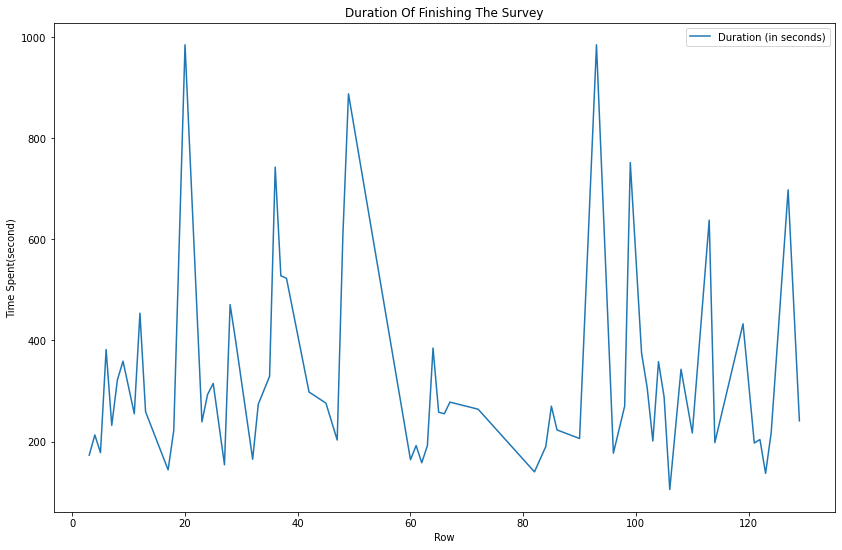

In [114]:
# The average time of finishing the survey is around 330 seconds that is equal to 5.5 minitues

team2.loc[:, ["Duration (in seconds)"]].astype(dtype="int64").plot(kind="line", figsize=(14, 9))
team2.loc[:, ["Duration (in seconds)"]].astype(dtype="int64").mean()

plt.title(label="Duration Of Finishing The Survey")
plt.xlabel(xlabel="Row")
plt.ylabel(ylabel="Time Spent(second)")

Text(0, 0.5, 'Count')

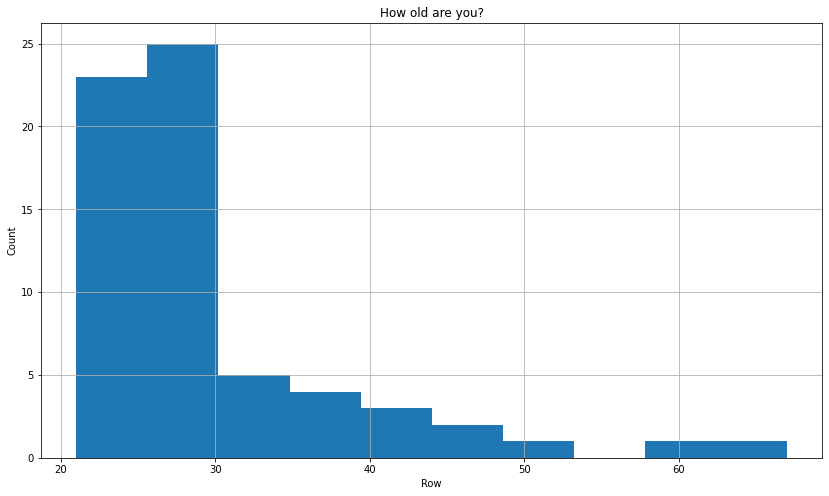

In [112]:
# Most responders are young adults between 20 to 30 years old. 
# Surprisingly, we got some responders who are older than 60 years old

team2["Q2"].astype(dtype="int32").hist(figsize=(14, 8), grid=True)

plt.title(label="How old are you?")
plt.xlabel(xlabel="Row")
plt.ylabel(ylabel="Count")

Text(0, 0.5, 'Percent')

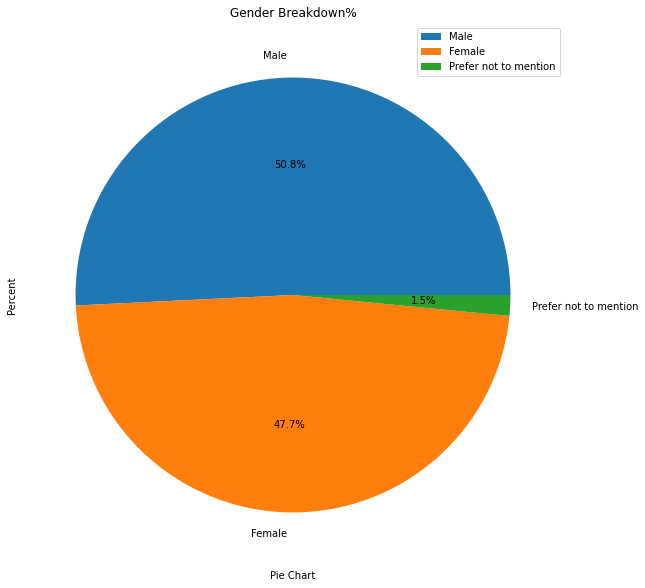

In [111]:
# The number of Male and Female responders are almost same

dic = dict(team2["Q3"].astype(dtype="category").value_counts())
df = pd.DataFrame(data={"Number":[dic["Male"], dic["Female"], dic["Prefer not to mention"]]},
                  index=["Male", "Female", "Prefer not to mention"])

plot = df.plot.pie(y="Number", autopct='%1.1f%%', figsize=(14, 10), )
plt.title(label="Gender Breakdown%")
plt.xlabel(xlabel="Pie Chart")
plt.ylabel(ylabel="Percent")

Text(0, 0.5, 'Count')

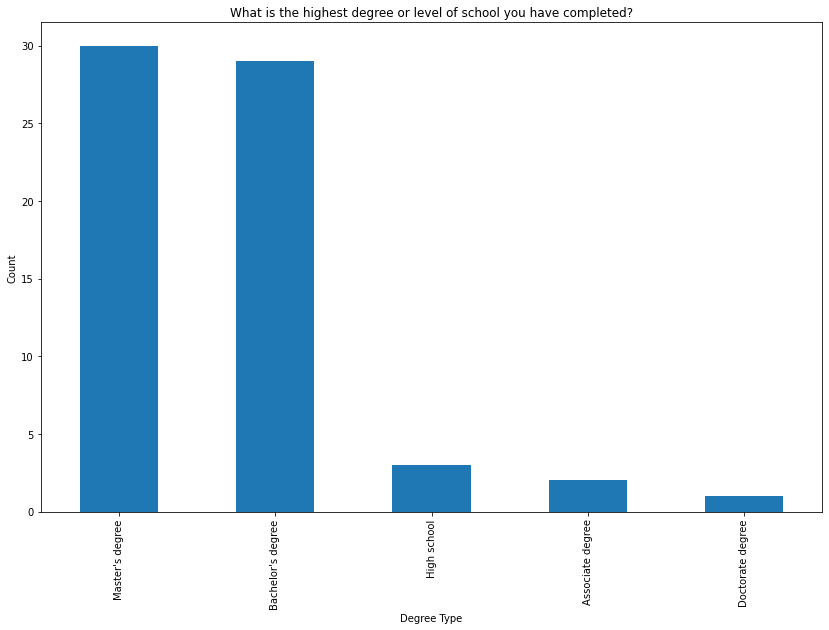

In [103]:
# Most of responders are holding master and bachelor's degree.


team2["Q4"].value_counts().plot(kind="bar", figsize=(14, 9))
plt.title(label="What is the highest degree or level of school you have completed?")
plt.xlabel(xlabel="Degree Type")
plt.ylabel(ylabel="Count")

Text(0, 0.5, 'Rating Score')

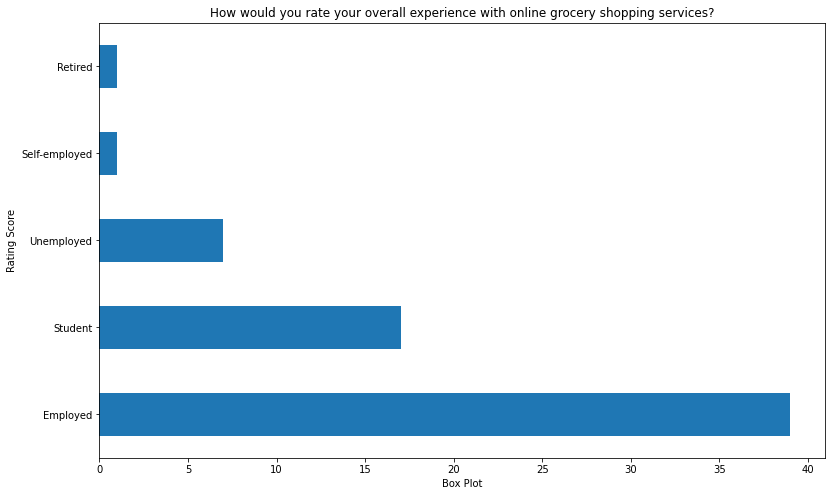

In [106]:
# Most of responders are Employed and we got a small sample who have retired

team2["Q5"].value_counts().plot(kind="barh", figsize=(13, 8))
plt.title(label="Employment status")
plt.xlabel(xlabel="Count")
plt.ylabel(ylabel="Employment Type")

Text(0, 0.5, 'Rating Score')

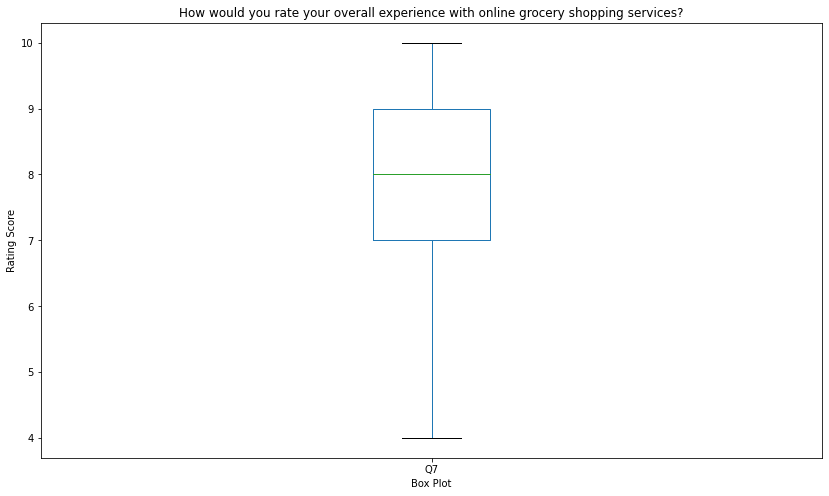

In [105]:
# Most responders have positive attitides about our survey
# The median of rate for this survey is 8 out of 10

# plt.boxplot(team2["Q7"].astype(dtype="int32"), labels=" ")
team2.loc[:, ["Q7"]].astype("int32").boxplot(grid=False, figsize=(14, 8))
plt.title(label="How would you rate your overall experience with online grocery shopping services?")
plt.xlabel(xlabel="Box Plot")
plt.ylabel(ylabel="Rating Score")